In [1]:
!pip install pandas --upgrade --quiet


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install openpyxl --upgrade --quiet


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scikit-learn --upgrade --quiet


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

In [6]:
# TASK 1: Load the data into a DataFrame. Provide the correct method and arguments.
df=pd.read_excel(data_url)


In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df['Total_Bill'] =df['Quantity'] * df['UnitPrice']

In [12]:
# Aggregate data at the customer level
customer_df = df.groupby('CustomerID').agg(
    Total_Bill_Size=('Total_Bill', 'sum'),
    First_Purchase=('InvoiceDate', 'min'),
    Last_Purchase=('InvoiceDate', 'max'),
    Most_Common_Location=('Country', lambda x: x.mode()[0]),
    Top_Item=('StockCode', lambda x: x.value_counts().idxmax())
)


In [13]:
# TASK 4: Calculate the purchase interval in days.
customer_df['Purchase_Interval_Days'] = (customer_df['Last_Purchase'] - customer_df['First_Purchase']).dt.days


In [14]:
# Reset index to have 'CustomerID' as a column
customer_df.reset_index(inplace=True)

# Display the customer-level dataframe
print(customer_df.head())

   CustomerID  Total_Bill_Size      First_Purchase       Last_Purchase  \
0     12346.0             0.00 2011-01-18 10:01:00 2011-01-18 10:17:00   
1     12347.0          4310.00 2010-12-07 14:57:00 2011-12-07 15:52:00   
2     12348.0          1797.24 2010-12-16 19:09:00 2011-09-25 13:13:00   
3     12349.0          1757.55 2011-11-21 09:51:00 2011-11-21 09:51:00   
4     12350.0           334.40 2011-02-02 16:01:00 2011-02-02 16:01:00   

  Most_Common_Location Top_Item  Purchase_Interval_Days  
0       United Kingdom    23166                       0  
1              Iceland    22375                     365  
2              Finland     POST                     282  
3                Italy    23112                       0  
4               Norway    21908                       0  


In [15]:
# Standardize the 'Total_Bill_Size' feature
scaler = StandardScaler()
customer_df['Total_Bill_Size_Scaled'] = scaler.fit_transform(customer_df[['Total_Bill_Size']])


In [16]:
# TASK 5: Implement K-Means clustering.
#Choose an appropriate number of clusters and set a random state for reproducibility.
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = scaler.fit_transform(customer_df[['Total_Bill_Size']])

In [25]:

# Function to summarize cluster information with improved readability
def summarize_cluster_info(clustered_df):
    for i in range(kmeans.n_clusters):
        cluster_data = clustered_df[clustered_df['Cluster'] == i]
        # TASK 6: Print a summary of each cluster.
        # Include customer count, average spend, top locations, and top items.
        print(f"\nCluster {i} Summary:")

        # Customer count in each cluster
        customer_count = len(cluster_data)
        print(f"Number of Customers in the cluster: {customer_count}")

        # Average spend in each cluster
        avg_spend = cluster_data['Total_Bill_Size'].mean()
        print(f"Average Spend: ${avg_spend:.2f}")

        # Top 3 Locations with counts
        top_locations = cluster_data['Most_Common_Location'].value_counts().head(3)
        print("Top 3 Locations:")
        for location, count in top_locations.items():
            print(f"{location}: {count} customers")

        # Top 3 Items with counts
        top_items = cluster_data['Top_Item'].value_counts().head(3)
        print("Top 3 Item Codes:")
        for item, count in top_items.items():
            print(f"{item}: {count} times purchased")

In [26]:
# Call the function to display the summary
summarize_cluster_info(customer_df)


Cluster 0 Summary:
Number of Customers in the cluster: 0
Average Spend: $nan
Top 3 Locations:
Top 3 Item Codes:

Cluster 1 Summary:
Number of Customers in the cluster: 0
Average Spend: $nan
Top 3 Locations:
Top 3 Item Codes:

Cluster 2 Summary:
Number of Customers in the cluster: 0
Average Spend: $nan
Top 3 Locations:
Top 3 Item Codes:

Cluster 3 Summary:
Number of Customers in the cluster: 0
Average Spend: $nan
Top 3 Locations:
Top 3 Item Codes:

Cluster 4 Summary:
Number of Customers in the cluster: 0
Average Spend: $nan
Top 3 Locations:
Top 3 Item Codes:


In [28]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [29]:
# Load the data
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(data_url)


In [30]:
# Preprocess the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Total_Bill'] = df['Quantity'] * df['UnitPrice']
customer_df = df.groupby('CustomerID').agg(
    Total_Bill_Size=('Total_Bill', 'sum'),
    Purchase_Interval_Days=('InvoiceDate', lambda x: (x.max() - x.min()).days)
).reset_index()


In [31]:
# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(customer_df[['Total_Bill_Size', 'Purchase_Interval_Days']])


In [32]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(features)

In [33]:
# Add clusters back to the dataframe
customer_df['Cluster'] = clusters

In [34]:
# Display clustering results
print("Cluster counts:")
print(customer_df['Cluster'].value_counts())

Cluster counts:
Cluster
 0    4337
 1      16
-1      12
 2       7
Name: count, dtype: int64


In [35]:
# Identify and display noise points
noise = customer_df[customer_df['Cluster'] == -1]
print(f"Noise points count: {len(noise)}")


Noise points count: 12


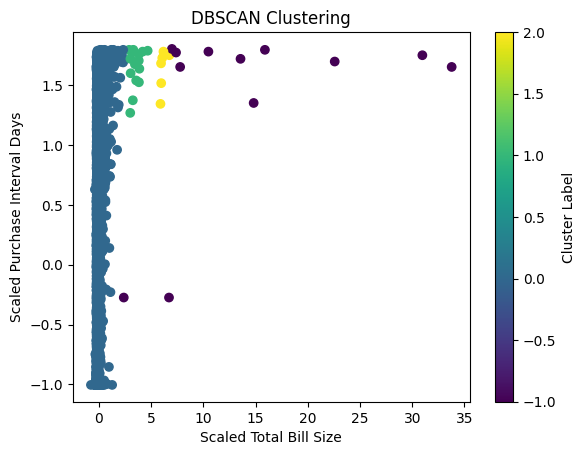

In [36]:
# Visualizing the results
plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Scaled Total Bill Size')
plt.ylabel('Scaled Purchase Interval Days')
plt.colorbar(label='Cluster Label')
plt.show()


In [37]:
# Summary of results
def summarize_clusters(df):
    grouped = df.groupby('Cluster')
    for key, group in grouped:
        if key == -1:
            continue  # Skip the noise points for detailed summary
        print(f"\nCluster {key} Summary:")
        print(f"Number of Customers: {len(group)}")
        avg_bill = group['Total_Bill_Size'].mean()
        avg_interval = group['Purchase_Interval_Days'].mean()
        print(f"Average Total Bill: {avg_bill:.2f}")
        print(f"Average Purchase Interval: {avg_interval:.2f}")

summarize_clusters(customer_df)


Cluster 0 Summary:
Number of Customers: 4337
Average Total Bill: 1381.65
Average Purchase Interval: 131.72

Cluster 1 Summary:
Number of Customers: 16
Average Total Bill: 30720.77
Average Purchase Interval: 353.69

Cluster 2 Summary:
Number of Customers: 7
Average Total Bill: 52637.10
Average Purchase Interval: 353.00
